# This is the tutorial for polyribosomes tracking.
Before everthing goes, you need put the star files with ribosomes in the directory the same as this tutorial.
The step following:

In [8]:
#conf for forward model 
#tomogram1
from genForwardPolyModel import genForwardPolyModel
import numpy as np
import os

conf = [ ]
zz0 = { }
zz0['type']='vect'
zz0['tomoName']='100.mrc'
zz0['numRepeats']=15
zz0['increPos']=np.array([60, 0, 10])
zz0['increAng']= np.array([0, 20, 30])
zz0['startPos']=np.array([500, 0, 0])
zz0['startAng']= np.array([-20, -10, -30])
zz0['minDist']=50
zz0['searchRad']=100
conf.append(zz0)

zz1 = { }
zz1['type']='vect'
zz1['tomoName']='100.mrc'
zz1['numRepeats']=30
zz1['increPos']=np.array([60, 4, 10])
zz1['increAng']= np.array([10, 20, 30])
zz1['startPos']=np.array([500, 0, 0])
zz1['startAng']= np.array([-20, -10, -30])
zz1['minDist']=50
zz1['searchRad']=100
conf.append(zz1)

zz2 = { }
zz2['type']='noise'
zz2['tomoName']='100.mrc'
zz2['numRepeats']=50
zz2['minDist']=50
zz2['searchRad']=100
conf.append(zz2)

#tomogram2
zz3 = { }
zz3['type']='vect'
zz3['tomoName']='101.mrc'
zz3['numRepeats']=15
zz3['increPos']= np.array([60, 4, 10])
zz3['increAng']= np.array([10, 20, 30])
zz3['startPos'] = np.array([0, 0, 0])
zz3['startAng']= np.array([-20, -10, -30])
zz3['minDist']=50
zz3['searchRad']=100
conf.append(zz3)

zz4 = { }
zz4['type']='vect'
zz4['tomoName']='101.mrc'
zz4['numRepeats']=50
zz4['increPos']= np.array([50, 10, 30])
zz4['increAng']= np.array([8, 12, -30])
zz4['startPos']=np.array([300, 200, 50])
zz4['startAng']= np.array([0, 0, 0])
zz4['minDist']=50
zz4['searchRad']=100
conf.append(zz4)

zz5 = { }
zz5['type']='noise'
zz5['tomoName']='101.mrc'
zz5['numRepeats']=200
zz5['minDist']=50
zz5['searchRad']=100
conf.append(zz5)
genForwardPolyModel(conf)
#
if os.path.exists('cluster-simOrderRandomized/run0/allTransforms.star'):
    os.remove('cluster-simOrderRandomized/run0/allTransforms.star')

if os.path.exists('cluster-simOrderRandomized/run0/scores/tree.npy'):
    os.remove('cluster-simOrderRandomized/run0/scores/tree.npy')

In [9]:
#1. load the polysome class and dependet modules
from polysome_class.polysome import Polysome
#2. initialize the polysome class, what you need do is feeding the following command with input_star == ***.star
#   and the root directory: run_time = *** (default:run0)
polysome1 = Polysome(input_star = 'simOrderRandomized.star', run_time = 'run0')

In [10]:
#3. modify the properties. Most properties are already initialized. What you should pay attention to is 
#   ==>clustThr: the threshold for clustering, higher clustThr, few clusters 
#   ==>relinkWithoutSmallClasses: if discard the classes that failed to form a cluster given the clustThr.
#      This is useful if you find the clustering results are poor. 
#   ==> miniNumTransforms: if keep the class of transformation if the number of transforms is smaller than this number, default is 0
polysome1.classify['clustThr'] = 5
polysome1.classify['relinkWithoutSmallClasses'] = 0
polysome1.sel[0]['minNumTransform'] = 0

In [11]:
#4. creat the outputfolder. By default, there will be one root directory named the same as the star file name
#   and other subdirectoris for data stored and figures for visulization.
polysome1.creatOutputFolder()

In [12]:
#5. calculating the transforms. Firstly, you should give two parameters:
#   5.1: the pixel size of your data used for this tutorial 
#   5.2: the distance between two ribosomes which we think tend to close 
polysome1.transForm['pixS'] = 3.42 # in Ang
polysome1.transForm['maxDist'] = 342 # in Ang
polysome1.calcTransForms()

####################################################
Calculating transformations for tomo 0..........
Calculating transfromation for tomo 0 with 0 pairs...........
Calculating transfromation for tomo 0 with 50 pairs...........
Calculating transfromation for tomo 0 with 100 pairs...........
Calculating transfromation for tomo 0 with 150 pairs...........
Finish calculating transformations for tomo 0 with 157 pairs, 0.21545 seconds consumed.
####################################################
Calculating transformations for tomo 1..........
Calculating transfromation for tomo 1 with 0 pairs...........
Calculating transfromation for tomo 1 with 50 pairs...........
Calculating transfromation for tomo 1 with 100 pairs...........
Calculating transfromation for tomo 1 with 150 pairs...........
Calculating transfromation for tomo 1 with 200 pairs...........
Calculating transfromation for tomo 1 with 250 pairs...........
Calculating transfromation for tomo 1 with 300 pairs...........
Calculatin

In [13]:
#6. using hieachical clustering method to cluster the data and give class for each transfrom. 
#   For data normalization in classfication, there offer three methods: 'scale2Ang'/'scale2AngFudge'/'mean0+1std', default:scale2Ang
#   You can change it by:  polysome1.classify['cmb_metric'] = 'scale2Ang'
import time
t1 = time.time()
polysome1.groupTransForms() #most time consuming step
t2 = time.time()
print('%d seconds consumed for distance calculation!'%(t2-t1))

Start calculating euc for 778 transforms
using single node
using inverse transforms
Finishing calculating transforms!
Start calculating ang for 778 transforms
Starting calculating rotation matrices for each transforms
Finishing calculating rotation matrices for each transforms
Starting calculating rotation matrices for each transforms
Finishing calculating rotation matrices for each transforms
using inverse transforms
using single node
Finishing calculating transforms distance!
Using scale2Ang to combine angles and shifts
calculating linkage
calculating linkage done
11 seconds consumed for distance calculation!


In [14]:
#7. select the data. We can split the data into different subset according to your purpose for further analysis. 
#   We offered three methods: transform class/polysome label/# of transforms. Default is by transform classes.
transListSel, selFolds = polysome1.selectTransFormClasses()

In [15]:
#8. align the transforms. For each transforms, there are two different transformation(from ribosome A->B OR B->A)
#   We align the transformations to the same direction.
polysome1.alignTransforms()  #will check the warning

Align the transform pairs


C:\Users\DELL\Anaconda3\envs\py36\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [16]:
#9. track the polysomes in the same transform class and the same tomogram. This will give each transform with the polysome label
polysome1.find_connectedTransforms()

tracking the polysomes.


In [17]:
#10. summary the tracking results. This step can generate two useful summary files in each transform class
#    10.1: statPerClass.star ==> the polysome information in each transform class
#    10.2: statPerPoly.star ==> the information for each polysome
#    Pay attention to if branches have been dected in polysomes
polysome1.analyseTransFromPopulation()

classNr	num	stdTransVect	stdTransAng	numPolybg5	numPolybg3	numPolyMax	numBranch		
3	43	0.5	0.4	2	2	29	0
1	49	0.1	0.8	1	1	49	0
2	14	0.2	0.5	1	1	14	0
0	672	18.9	38.5	-1	-1	-1	-1


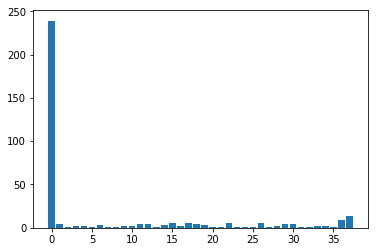

classn+1        ||    classn-1    abundance
  -1 -1 -1	||	-1 -1 -1		30.72%
   3 -1 -1	||	3 -1 -1		1.80%
   3 -1 -1	||	-1 3 -1		1.16%
  -1 -1 3	||	3 -1 -1		0.64%
  -1 3 -1	||	3 -1 -1		0.64%
  -1 1 -1	||	-1 -1 1		0.64%
  -1 2 -1	||	2 -1 -1		0.64%
  -1 -1 1	||	-1 1 -1		0.51%
  -1 1 -1	||	-1 1 -1		0.51%
  -1 -1 1	||	1 -1 -1		0.51%


In [18]:
#11. summary the classes distribution information.(Creating)
polysome1.find_transFromNeighbours()

In [19]:
#10. analysis the pattern of ribosomes in each transform class (developing)
polysome1.analyseConfClasses()  #developing


skipping conf. Class analysis ==> no conf class selected


In [20]:
#11. generating the information of ribosomes from the transform selection from step7
polysome1.genOutputList(transListSel, selFolds)

generating selection lists


In [21]:
#12. averaging the ribosomes in each class transform (developing)
polysome1.generateTrClassAverages()
polysome1.genTrClassForwardModels()

skipping translational class averaging
skipping forward model generation


 
rendering figures
more than one tomogram in list
tomoID: 0  tomoName: 100.mrc
tomoID: 1  tomoName: 101.mrc
rendering vector fields


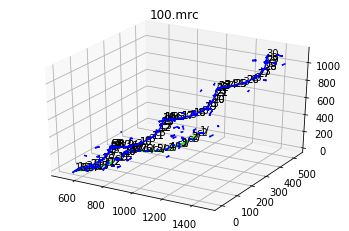

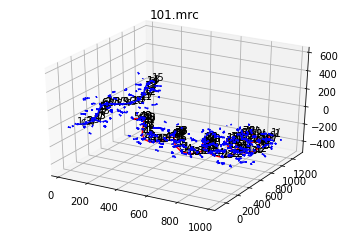

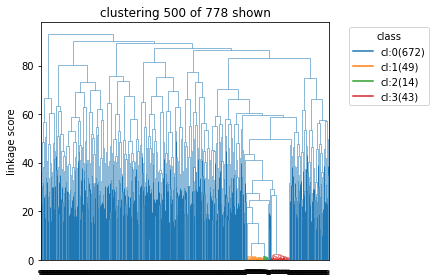

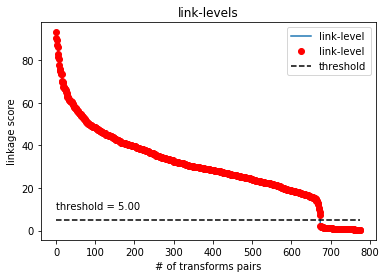

rendering figures done


In [22]:
#13. generating figures for visilization 
polysome1.visResult()

 
rendering figures
more than one tomogram in list
tomoID: 0  tomoName: 100.mrc
tomoID: 1  tomoName: 101.mrc
rendering vector fields


<IPython.core.display.Javascript object>


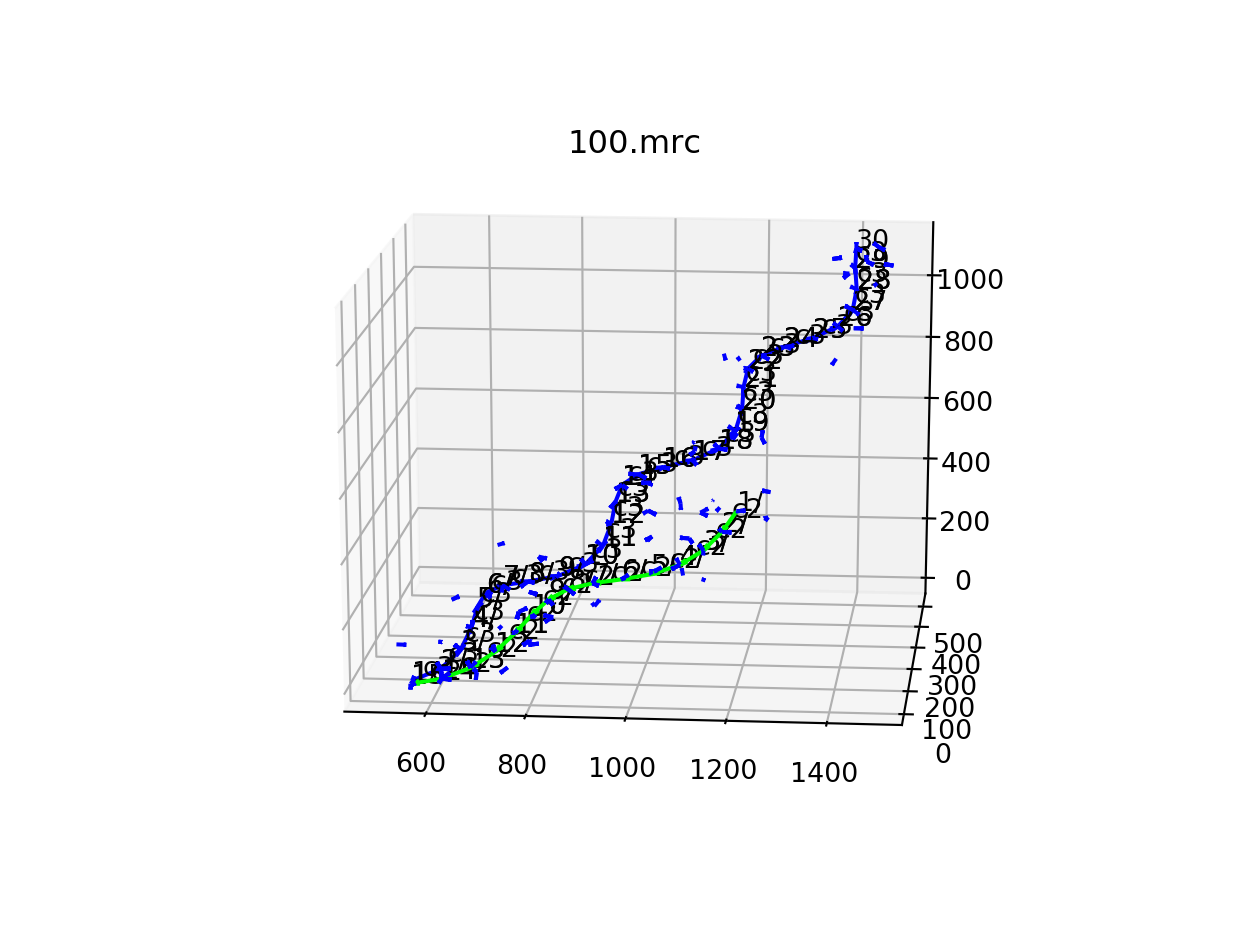

<IPython.core.display.Javascript object>


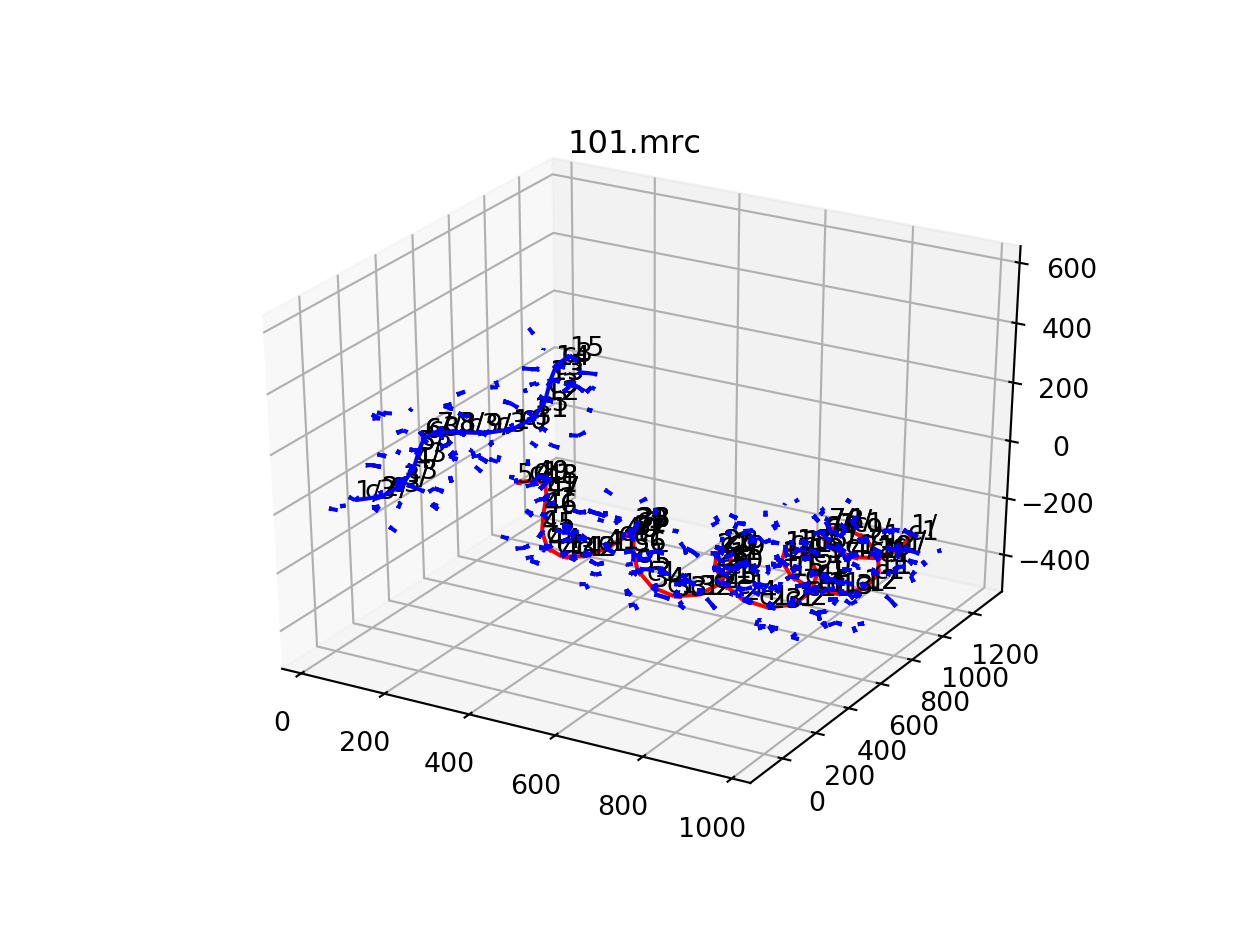

<IPython.core.display.Javascript object>


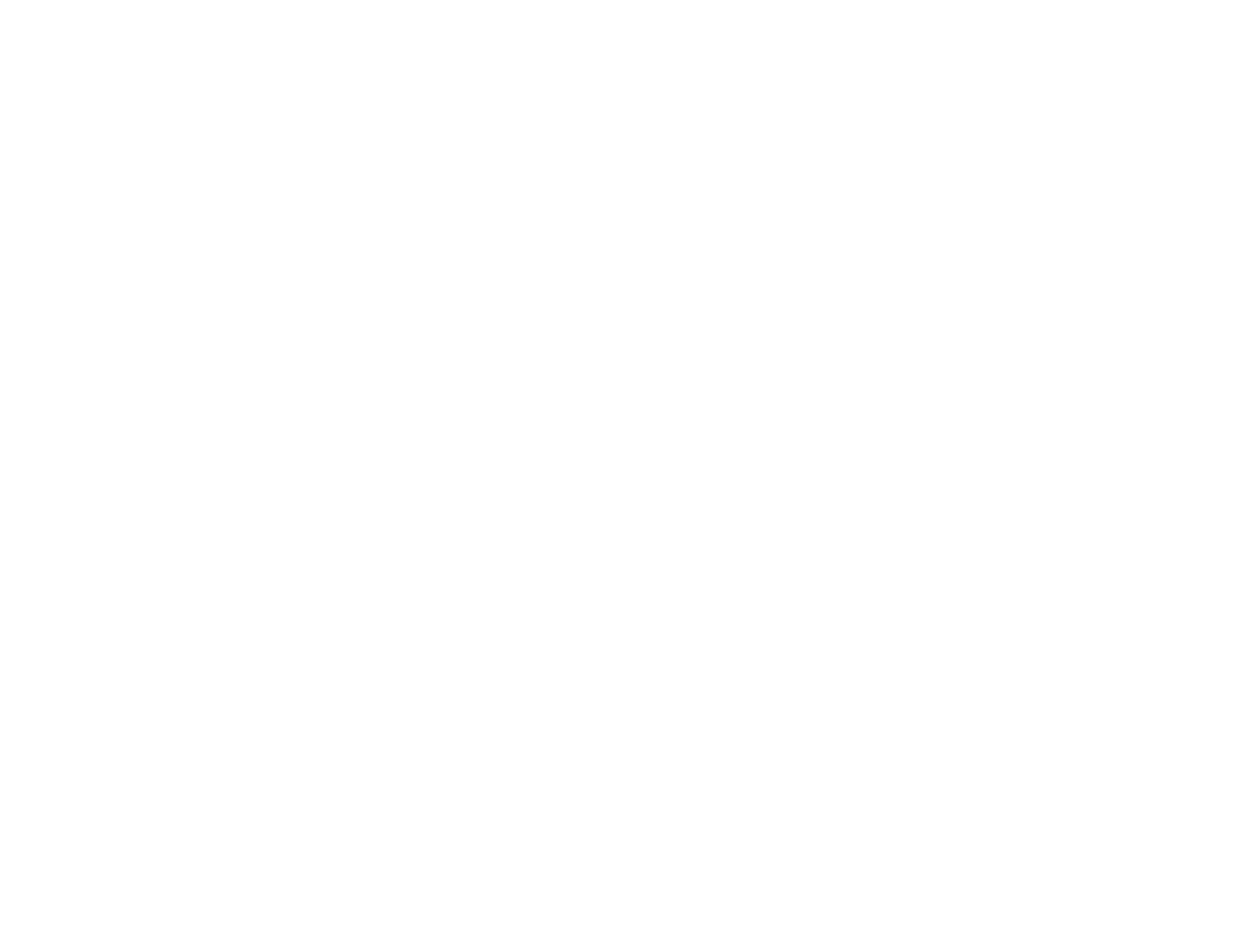

<IPython.core.display.Javascript object>


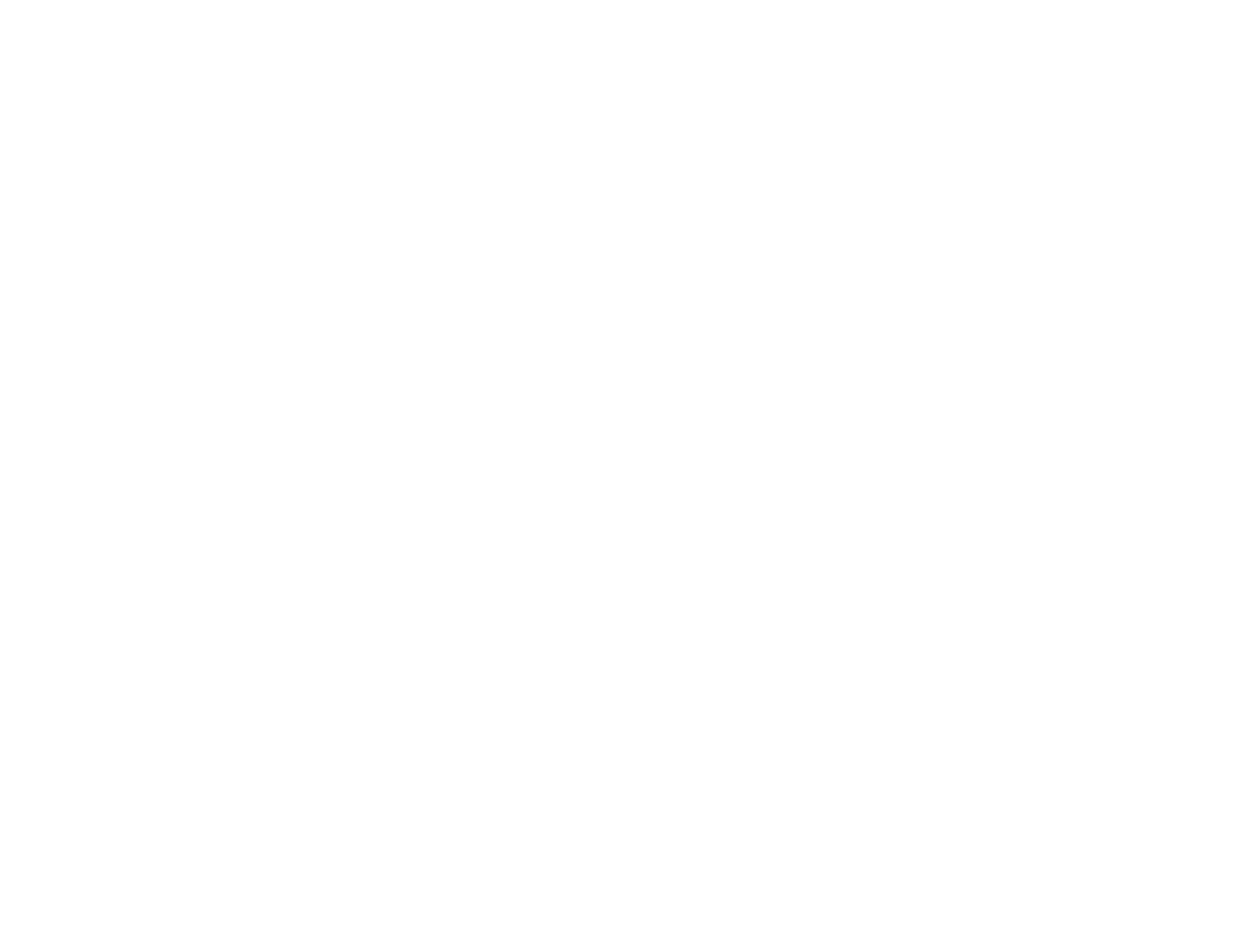

rendering figures done


In [23]:
%matplotlib notebook
polysome1.visResult()